In [3]:
import src.utils as plh
import os
import gc

PROJECT_ROOT = plh.get_project_root()
#PROJECT_ROOT

### Read raw json file to download the image and there meta data ###

In [ ]:
from src.process_json_data import read_data

numbers_records = read_data()

if numbers_records == 0:

    print('No records to process found')

else:
    
    print(f'Sucessfully processed: {numbers_records} of raw data and saved as "processed_data.parquet" at project "data" folder')

In [ ]:
#When working on kaggel notebook, we zip the download images and download them from the url. 
#Code for that is bellow. This code is not required when working on local environment.
#Bellow code if for my reference

"""
from src.utils import zipdir
import zipfile
import os

download_image = os.path.join(os.getcwd(),'images.zip')  
zipf = zipfile.ZipFile(download_image, 'w', zipfile.ZIP_DEFLATED)
zipdir(os.path.join(os.getcwd(), 'data', 'images'), zipf)
zipf.close()  

#We need to set working directory to kaggel output folder to allow download the file's from URL
!cd '/kaggle/working'
!ls

#Output url link to download
from IPython.display import FileLink
FileLink(r'images.zip')

FileLink(r'processed_data.parquet')

#Previous use bellow code. But now they did not work. Had to change the working directory to '/kaggel/working'
from IPython.display import FileLink
FileLink('/kaggle/working/images.zip')

#E.g: Code to delete folder 
##import shutil
##shutil.rmtree(os.path.join(base_path, 'data', 'images'))
"""

### Read the downloaded data files ###

In [2]:
import pandas as pd

dbset = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'images_metadata.parquet'))
pd.concat([dbset.head(2), dbset.tail(2), dbset.sample(4, random_state = 42)])

,id,title,desc,detail,category,color,image_url,image_name,image_extension,image_size
0,122349,chain link jeans cuff bracelet,subtly futuristic and edgy this liquid metal c...,"DETAILS & CARE\nSubtly futuristic and edgy, th...",bracelet,Gold,https://n.nordstrommedia.com/id/sr3/58d1a13f-b...,58d1a13f-b6b6-4e68-b2ff-3a3af47c422e.jpeg,jpeg,2640x4048
1,84557,whitmore plain toe boot,high quality leather construction defines a he...,DETAILS & CARE\nHigh-quality leather construct...,boot,Black Leather,https://n.nordstrommedia.com/id/sr3/21e7a67c-0...,21e7a67c-0a54-4d09-a4a4-6a0e0840540b.jpeg,jpeg,2640x4048
198,54800,harlow long sleeve button up tee,this closet staple soft cotton top boast a chi...,"DETAILS & CARE\nThis closet-staple, soft cotto...",tee,Iindigo,https://n.nordstrommedia.com/id/sr3/ade997d3-6...,ade997d3-6db4-4eea-a6d3-2c43dcecea85.jpeg,jpeg,2640x4048
199,68768,crow print wool bomber jacket,this wool bomber jacket becomes wearable art w...,DETAILS & CARE\nThis wool bomber jacket become...,jacket,Charcoal,https://n.nordstrommedia.com/id/sr3/341ebff1-7...,341ebff1-7e50-4224-8c57-e3ee3c85fad3.jpeg,jpeg,2640x4048
3408,51024,tintor color by number tinsel stripe sweater,any day feel like a holiday in this tinsel str...,DETAILS & CARE\nAny day feels like a holiday i...,sweater,Navy,https://n.nordstrommedia.com/id/sr3/38d5120f-d...,38d5120f-db24-4107-ba77-a839229b04d6.jpeg,jpeg,2640x4048
2294,66336,monterey pullover hood,contrast shading line the hood and pop at the ...,DETAILS & CARE\nContrast shading lines the hoo...,hood,Titanium,https://n.nordstrommedia.com/id/sr3/771b267d-f...,771b267d-fa8b-4e97-98ac-8ee2f431a45f.jpeg,jpeg,2640x4048
259,125830,shalford stripe blanket scarf,supersoft and cozy this oversized striped blan...,"DETAILS & CARE\nSupersoft and cozy, this overs...",scarf,Egyptian Gold Multi,https://n.nordstrommedia.com/id/sr3/8468f5e3-4...,8468f5e3-4256-44d4-acb6-71fba5b5db24.jpeg,jpeg,2640x4048
355,133099,embroidered slide sandal,colorful geometric embroidery give an artisana...,DETAILS & CARE\nColorful geometric embroidery ...,sandal,Black/ Mango,https://n.nordstrommedia.com/id/sr3/b814bd8f-b...,b814bd8f-bec7-4c4d-af85-bb8b06a2a1a2.jpeg,jpeg,1320x2024


In [5]:
print(dbset[dbset['id'].isin([66336, 125830, 54800])]['desc'].values)

['supersoft and cozy this oversized striped blanket scarf is big enough to wear a a shawl making it an indoor outdoor fave'
 'contrast shading line the hood and pop at the placket cuff and hem of a casual easy wearing pullover done in grey heathered cotton'
 'this closet staple soft cotton top boast a chic yet relaxed vibe with a longer cut a curved hem and snap button up the front']


In [6]:
print(dbset[dbset['id'].isin([66336, 125830, 54800])]['detail'].values)

['DETAILS & CARE\nSupersoft and cozy, this oversized striped blanket scarf is big enough to wear as a shawl (making it an indoor-outdoor fave).\n54 1/2"; 1" fringe\n100% acrylic\nMachine wash, tumble dry\nImported\nItem #5956095'
 'DETAILS & CARE\nContrast shading lines the hood and pops at the placket, cuffs and hem of a casual, easy-wearing pullover done in grey heathered cotton.\n28" length (size Medium)\nDrawstring hood\n100% cotton\nMachine wash, dry flat\nImported\nItem #5829660'
 'DETAILS & CARE\nThis closet-staple, soft cotton top boasts a chic yet relaxed vibe with a longer cut, a curved hem and snap buttons up the front.\n27" length (size Medium)\nFront button closure\nPoint collar\nChest pocket\nLong sleeves with button cuffs\n100% cotton\nHand wash, dry flat\nImported\nPoint of View\nItem #5869852']


**Observation**

* Spelling correct is required on the description of the item.
* Some title of the item include the band name as well.


In [7]:
dbset.shape

(20124, 10)

In [8]:
dbset.columns

Index(['id', 'title', 'desc', 'detail', 'category', 'color', 'image_url',
       'image_name', 'image_extension', 'image_size'],
      dtype='object')

#### Inital EDA on the image metadata ####

In [9]:
dbset.image_size.unique()

array(['2640x4048', '1100x1687', '1320x2024', '3456x5184', '1100x1650',
       '1100x1130'], dtype=object)

In [10]:
dbset.image_extension.unique()

array(['jpeg'], dtype=object)

##### Observation: #####

1. We have image's of different sizes. So we will need to resize to common size. 
    * Will resize them to 1024*1024
2. Images have same exetension.


In [11]:
dbset['id'].nunique()

20124

In [13]:
dbset['image_name'].nunique()

20028

##### Observation #####

1. We have duplicate image metadata, since number of unique image name is less then image id. i.e we have unique image id but same image.

Drop the duplicate image meatdata information.

In [14]:
dbset.drop_duplicates(subset = ['image_name'], keep = 'first', inplace = True)
dbset.shape

(20028, 10)

In [15]:
dbset.reset_index(drop = True, inplace = True)

In [16]:
dbset.head(2)

,id,title,desc,detail,category,color,image_url,image_name,image_extension,image_size
0,122349,chain link jeans cuff bracelet,subtly futuristic and edgy this liquid metal c...,"DETAILS & CARE\nSubtly futuristic and edgy, th...",bracelet,Gold,https://n.nordstrommedia.com/id/sr3/58d1a13f-b...,58d1a13f-b6b6-4e68-b2ff-3a3af47c422e.jpeg,jpeg,2640x4048
1,84557,whitmore plain toe boot,high quality leather construction defines a he...,DETAILS & CARE\nHigh-quality leather construct...,boot,Black Leather,https://n.nordstrommedia.com/id/sr3/21e7a67c-0...,21e7a67c-0a54-4d09-a4a4-6a0e0840540b.jpeg,jpeg,2640x4048


In [17]:
#Check if any datapoint has blank desc. 
dbset['desc'].isnull().sum()

0

In [18]:
dbset[dbset['desc'] == ''].count()

id                 0
title              0
desc               0
detail             0
category           0
color              0
image_url          0
image_name         0
image_extension    0
image_size         0
dtype: int64

In [19]:
dbset['title'].isnull().sum()

0

In [20]:
dbset[dbset['title'] == ''].count()

id                 0
title              0
desc               0
detail             0
category           0
color              0
image_url          0
image_name         0
image_extension    0
image_size         0
dtype: int64

##### Observation #####

1. We do not have records where 'title' or 'desc' feature is blank, null for any data points.

In [39]:
#Let's look at the text's we can we for our caption generation
with pd.option_context("display.max_colwidth", None): #Set max col width to see the fill text with-in the code context. Outside of this it will behave as default
    print(dbset.sample(10, random_state = 42)['title'])

6252              debbie ribbon high waist crop jeans jeans
7473                      abby scallop hem crop jeans jeans
4706                               under the sea maxi dress
11031                                  222 banda coen t tee
1866       citizen of humanity emanuelle slim bootcut jeans
2300     soar classic fit plaid performance button down tee
7201                                     grenoble logo hood
9231               tybee breeze shorts sleeve button up tee
6848                                  high waist crop pants
19639                         farris sequin fit flare dress
Name: title, dtype: object


In [40]:
with pd.option_context("display.max_colwidth", None):
    print(dbset.sample(10, random_state = 42)['desc'])

6252                                                    a striped ribbon whizzing around the waist give these stretchy high waist jeans a playfully preppy feel
7473                                                 fringy scalloped hem give retro chic style to soft and stretchy cropped jeans jeans in a casual light wash
4706                         watery streak of blue refresh a vacay ready max of soft jersey shaped with a waist whittling twist and a gracefully angled hemline
11031                            slim piping frame the omini logo tape that pop at the sleeve and shoulder of a cotton t tee sporting a small logo on the chest
1866                                             soft sustainable and stretchy fabric make these high waist flared jeans an impeccably smart and stylish choice
2300     stretchy sweat wicking fabric keep up with you on even your longest day in a comfortably tailored sport tee that stay looking crisp from desk to drink
7201                        reflect your

In [41]:
with pd.option_context("display.max_colwidth", None):
    print(dbset.sample(10, random_state = 42)['detail'])

6252                                                                                                    DETAILS & CARE\nA striped ribbon whizzing around the waist gives these stretchy high-waist skinnies a playfully preppy feel.\n26" inseam; 11" leg opening; 11" front rise; 14 1/2" back rise (size 29)\nButton fly\nFive-pocket style\n87% cotton, 11% polyester, 2% polyurethane\nDry clean\nMade in the USA\nvia C\nItem #5847123\nHelpful info:\nDefining the Rise-Women's
7473                                                                           DETAILS & CARE\nFringy scalloped hems give retro-chic style to soft and stretchy cropped skinny jeans in a casual light wash.\n26" inseam; 10" leg opening; 10" front rise; 15" back rise\nZip fly with button closure\nFive-pocket style\n70% cotton, 20% polyester, 8% rayon, 2% spandex\nMachine wash, tumble dry\nImported\nPoint of View\nItem #5811932\nHelpful info:\nDefining the Rise-Women's
4706                                                        

##### Observation #####

1. 'detail' feature:
    * Describe in detail about the product and it's quality. To work with this feature requires cleaning. It has special char, integer etc.
2. 'desc feature: 
    * Provide long text information about the product. Not ideal for captioning an image. 
    * There are statement with only one word e.g "cotton t tee" here "t" has no meaning in the statement. Is it short for "the"? Such word need to be removed before we can use this feature for caption. 
3. 'title' feature:
    * Short text information good for captioning the product.
4. 'color' feature:
    * Base color of the item. It should be a part of the image caption, as if we consider the use case of image caption in fashion can be where user search text to find the item using the user search text and the caption of the image by computing similarity we can filter the item the user is looking for. In some case user specify the color of the product they are looking for. So in such case color be a part of the image caption make sence.


##### Save required image metadata information need to new file #####

Changes made in the file:

1. Drop duplicate records which had same image_name.
2. Save only the required information need for the problem statement. 
    * id
    * title
    * image_name
    * color

In [44]:
dbset[['id', 'title', 'image_name', 'color']].to_parquet(os.path.join(PROJECT_ROOT, 'data', 'images_metadata_clr.parquet'))

#### Randomly look at some of the images ####

In [2]:
import pandas as pd
import os

dbset = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'images_metadata_clr.parquet'))

sample_db = dbset.sample(5, random_state = 42)

In [3]:
sample_db.head()

,id,title,image_name,color
6252,14657,debbie ribbon high waist crop jeans jeans,f8f2ad82-ec88-4e30-b237-6b8247494b23.jpeg,Cadet W/ Waistband Stripe
7473,94679,abby scallop hem crop jeans jeans,4a71f31b-9b4d-4945-aa5f-155738a303fa.jpeg,Ibiza
4706,18815,under the sea maxi dress,5d3e8b55-9fff-4fa6-8e39-601fb4001e14.jpeg,Island Navy
11031,63006,222 banda coen t tee,b0b6a06d-90c4-4e81-b1c9-cf5c77441aa0.jpeg,Azure/ Grey Silver/ Black
1866,53760,citizen of humanity emanuelle slim bootcut jeans,69a9e841-ce6e-466d-93e2-64cbc46e2f45.jpeg,Chit Chat


In [5]:
IMAGE_BASE_FOLDER = os.path.join(PROJECT_ROOT, 'data', 'images')
#IMAGE_BASE_FOLDER

In [11]:
#import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def show_image(image_name, resize = False, scale = False): 

    image_path = os.path.join(IMAGE_BASE_FOLDER, image_name)

    img = Image.open(image_path) #We can just use Image.open to see the image. But our end goal is to store np array. So sample code to check if that is possible

    if resize == True:
        img = img.resize((1024, 1024))

    img_arr = np.array(img)

    if scale == True:
        img_arr = img_arr/255
        
    plt.imshow(img_arr)
    
    #return img_arr

    """
    # Code when use matplotlib.Image 
    # Read Images
    img = mpimg.imread(image_path)

    # Output Images
    plt.imshow(img)
    """

In [32]:
"""
image_path = os.path.join(IMAGE_BASE_FOLDER, sample_db.iloc[0]['image_name'])
img = Image.open(image_path)
img_arr = np.array(img)

img_arr.shape
"""

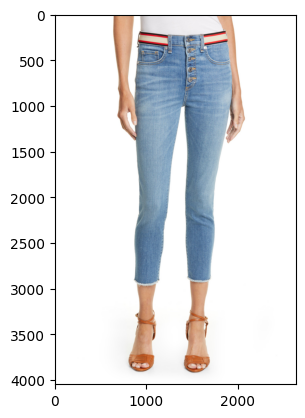

In [29]:
show_image(sample_db.iloc[0]['image_name'])

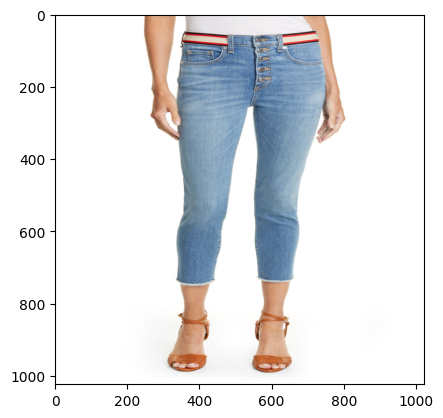

In [12]:
show_image(sample_db.iloc[0]['image_name'], resize = True)

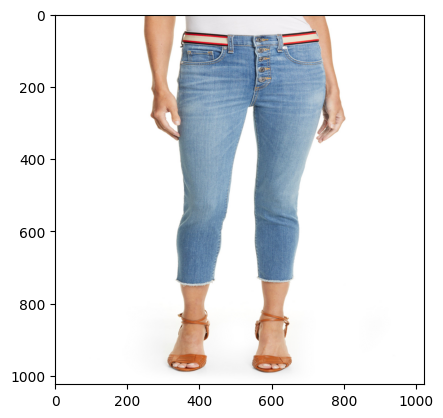

In [13]:
show_image(sample_db.iloc[0]['image_name'], resize = True, scale = True)

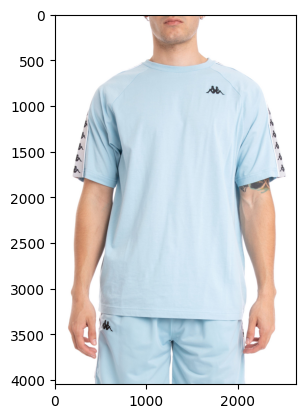

In [18]:
show_image(sample_db.iloc[-2]['image_name'])

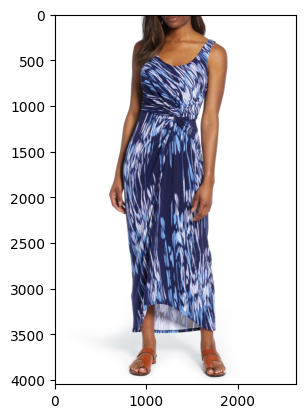

In [19]:
show_image(sample_db.iloc[2]['image_name'])

### Split data into Train, Valid and Test ###

In [2]:
CLEAN_IMAGE_METADATA = os.path.join(PROJECT_ROOT, 'data', 'images_metadata_clr.parquet')
#CLEAN_IMAGE_METADATA

In [3]:
import pandas as pd 

dbset = pd.read_parquet(CLEAN_IMAGE_METADATA)
dbset.shape

(20028, 4)

In [4]:
#Split the dataset into train, valid, test split
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.90
VAL_RATIO = 0.05
TEST_RATIO = 0.05
SEED = 2023

#Split for train dataset
X_train, X_test, _, _ = train_test_split(dbset, dbset.title, 
                                         train_size = TRAIN_RATIO, 
                                         random_state = SEED, 
                                         shuffle = True)

#Split for Valid and test dataset
X_valid, X_test, _, _ = train_test_split(X_test, X_test.title, 
                                         test_size = TEST_RATIO, 
                                         random_state = SEED, 
                                         shuffle = True)



In [5]:
#Making sure that there are no records duplicate in both train, Val
set(X_valid['id']).intersection(set(X_train['id']))

set()

In [6]:
#Making sure that there are no records duplicate in both Val and test
set(X_valid['id']).intersection(set(X_test['id']))

set()

In [7]:
#Making sure that there are no records duplicate in both train and test
set(X_train['id']).intersection(set(X_test['id']))

set()

In [8]:
#Check if the split sum's up to be total

print(f'Number of records in train : {X_train.shape[0]}')
print(f'Number of records in Valid : {X_valid.shape[0]}')
print(f'Number of records in test : {X_test.shape[0]}')

print(f'Total records: {X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]} ')

#Number of records in original dataset
dbset.shape

Number of records in train : 18025
Number of records in Valid : 1902
Number of records in test : 101
Total records: 20028 


(20028, 4)

In [9]:
#Save them into files
TRAIN_DATA_FILE = os.path.join(PROJECT_ROOT, 'data', 'processed', 'train_data.parquet')
X_train.to_parquet(TRAIN_DATA_FILE)

VALID_DATA_HDF5_FILE = os.path.join(PROJECT_ROOT, 'data', 'processed', 'validate_data.parquet')
X_valid.to_parquet(VALID_DATA_HDF5_FILE)

TEST_DATA_HDF5_FILE = os.path.join(PROJECT_ROOT, 'data', 'processed', 'test_data.parquet')
X_test.to_parquet(TEST_DATA_HDF5_FILE)

In [10]:
import gc

del [dbset, X_train, X_valid,X_test]
gc.collect()

0

### Convert the images to numpy array and it's metadata to hdf5 format ###

Create a script file for this task.<br>
Script will read the file in batch, process the batch data and store them in seperate .h5 file of the batch. Finally merge each .h5 of the batch into one
<br><br>Input paramter of the scripts<br>
    -d: filename with path, that need to be processed<br>
    -b batch of data to read, batch_size<br>
    
Help link refer:
* https://www.dbersan.com/blog/neural-boilerplate/
* https://github.com/h5py/h5py/issues/745

In [ ]:
#train dataset
file_name = 'data\processed\train_data.parquet'
batch_size = 300

!python preprocess_images.py -d file_name -b batch_size

In [ ]:
#Validation dataset
file_name = 'data\processed\validate_data.parquet'
batch_size = 300

!python preprocess_images.py -d file_name -b batch_size

In [ ]:
#Test dataset
file_name = 'data\processed\test_data.parquet'
batch_size = 300

!python preprocess_images.py -d file_name -b batch_size

##### Verfiy the data generated .h5 files #####

In [16]:
IMAGE_FOLDER = os.path.join(PROJECT_ROOT, 'data', 'images')
#IMAGE_FOLDER

In [17]:
import matplotlib.pyplot as plt
import h5py

def show_image_hdf5(index = 0, name = 'test'): 
 
    #HDF5_FILEPATH = os.path.join(PROJECT_ROOT, 'data', 'processed', name +'_data.h5')
    HDF5_FILEPATH = os.path.join(PROJECT_ROOT, 'data', 'processed', name)
    x_name = 'np_image' #'x_' + name
    y_name = 'id_image' #'y_' + name

    with h5py.File(HDF5_FILEPATH, 'r') as hdf5_file:

        cnt = hdf5_file[x_name].shape[0]
        print(f'Records in {name} dataset: {cnt}')

        image = hdf5_file[x_name][index]
        image = (image*255).astype(int) #Since the image data stored will be normalize format, we shall convert them back in range of 0 to 255 and then view


        print(f'Image id: {hdf5_file[y_name][index]}')
        plt.imshow(image)
        plt.show()

Records in test_data.h5 dataset: 101
Image id: 132094


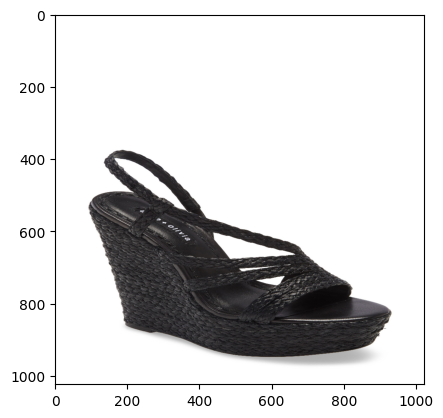

In [5]:
show_image_hdf5(0, 'test_data.h5')

Records in test dataset: 5
Image id: 118715


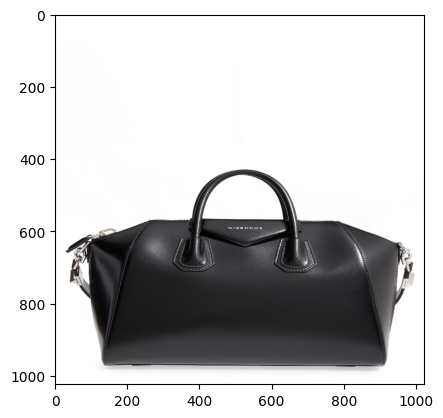

In [7]:
show_image_hdf5(3, 'test_data.h5')

Records in test dataset: 101
Image id: 87980


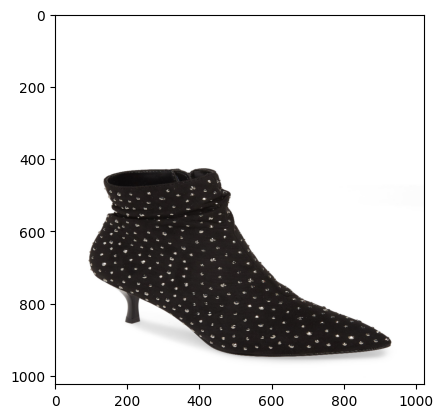

In [6]:
show_image_hdf5(34, 'test_data.h5')

Records in validate_data.h5 dataset: 1902
Image id: 41080


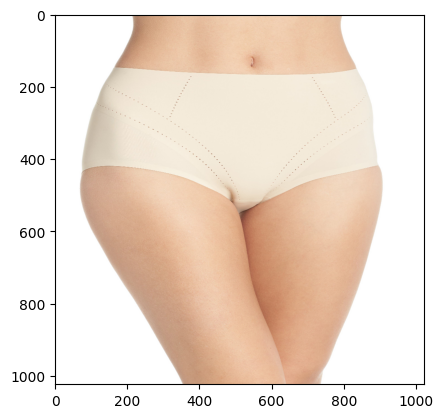

In [9]:
show_image_hdf5(150, 'validate_data.h5')

Records in validate_data.h5 dataset: 1902
Image id: 60978


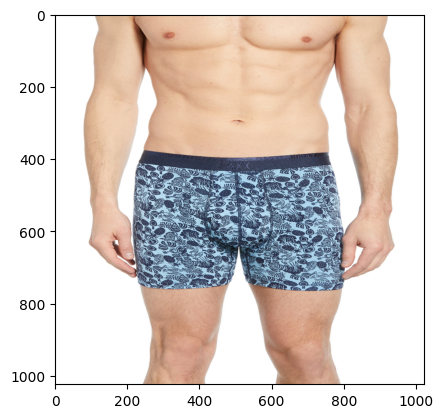

In [10]:
show_image_hdf5(1901, 'validate_data.h5')

Records in validate_data.h5 dataset: 1902
Image id: 63739


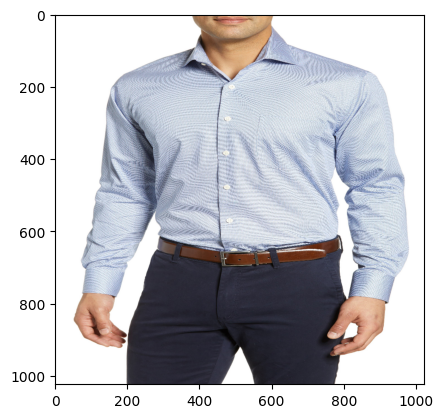

In [11]:
show_image_hdf5(1200, 'validate_data.h5')

Records in train_data.h5 dataset: 18025
Image id: 132682


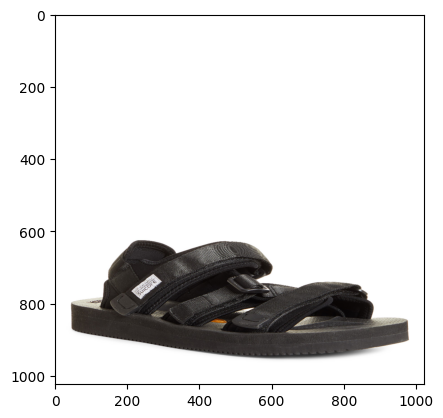

In [13]:
show_image_hdf5(1200, 'train_data.h5')

Records in train_data.h5 dataset: 18025
Image id: 70873


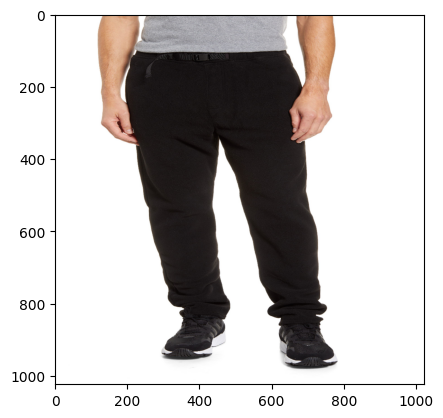

In [16]:
show_image_hdf5(15856, 'train_data.h5')

Records in train_data.h5 dataset: 18025
Image id: 51114


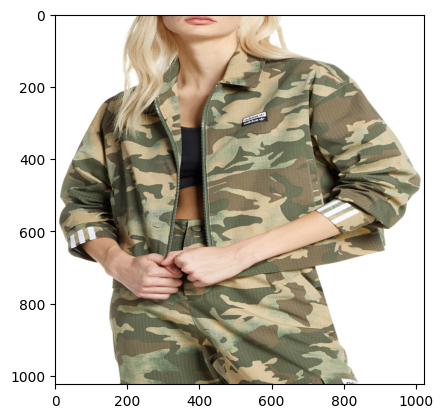

In [15]:
show_image_hdf5(17478, 'train_data.h5')

### Extract image features (Xception) - Optional ###

We will use pretrained Xception model weights in imagenet, to extact the features for the input image and save to file.

#### Extract feature into dictonary and save to .pkl ####

In [ ]:
from keras.applications.xception import Xception
from keras.layers import Input

In [ ]:
xception_model = Xception( weights = 'imagenet', include_top = False, pooling = 'avg' , input_tensor = Input(shape = (1024, 1024, 3)))
print(xception_model.summary())

In [ ]:
from pickle import dump
from tqdm import tqdm
import h5py
#import math

def generator_read_hdf5(name, batch_size):

    HDF5_FILEPATH = os.path.join(PROJECT_ROOT, 'data', 'processed', name)
    x_name = 'np_image' 
    y_name = 'id_image'

    index = 0
    with h5py.File(HDF5_FILEPATH, 'r') as hdf5_file:

        record_cnt = len(hdf5_file[x_name])
        yield record_cnt

        #no_batch = math.ceil(record_cnt/batch_size)
        start_index = 0
        for end_index in range(batch_size, record_cnt, batch_size):

            image = hdf5_file[x_name][start_index: end_index]
            image_id = hdf5_file[y_name][start_index: end_index]

            yield image_id, image

            start_index = end_index
            del [image, image_id]

    return

def extract_features(model, file_name, batch_size = 250):

    yield_obj = generator_read_hdf5(file_name, batch_size)

    record_cnt = next(yield_obj)
    image_features = {}

    for _ in tqdm(range(batch_size, record_cnt, batch_size)):
        
        image_ids, images = next(yield_obj)

        #images = np.expand_dims(images, axis = 0)
        feature = model.predict(images, verbose = 0)
        
        #Store the extra image features to dict

        for i, keys in enumerate(image_ids):
            image_features[keys] = feature[i]

        del [image_ids, images, feature]

    return image_features

In [ ]:
#Extract feature for train data with inception

train_feature = extract_features(xception_model, 'train_data.h5')
dump(train_feature, open("train_features_image_xception.pkl","wb"))

In [ ]:
#Extract feature for valid data with inception

validate_feature = extract_features(xception_model, 'validate_data.h5')
dump(train_feature, open("validate_features_image_xception.pkl","wb"))


Due to memory issue was not able to create a dict of train data.</br>
Each each extract feature of size 2048 . Total feature size is 18k * 2048

#### Extract each image features into individual .npy ####

In [ ]:
import tensorflow as tf

devices = tf.config.experimental.list_physical_devices('GPU')
num_replicas_in_sync = len(devices)

strategy = tf.distribute.MirroredStrategy()

options = tf.data.Options()    
options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA

num_replicas_in_sync

In [ ]:
from keras.applications.xception import Xception

with strategy.scope(): 
    
    xception_model = Xception( weights = 'imagenet', include_top = False, pooling = 'avg')

    new_input = xception_model.input # Any arbitrary shapes with 3 channels
    hidden_layer = xception_model.layers[-1].output

    image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [ ]:
from keras.applications.xception import preprocess_input

def load_image(image_path, image_id):
  
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels = 3)
    img = tf.image.resize(img, (224, 224))
    img = preprocess_input(img)
    
    return img, image_id

In [ ]:
import os

os.makedirs(os.path.join('data','processed', 'image_feature_extracted_using_inception'))

##### Extract feature for images in Train dataset #####

In [ ]:
import pandas as pd

db_train = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'train_data_processed.parquet'))
db_train['image_path'] = db_train['image_name'].apply(lambda x : os.path.join(PROJECT_ROOT, 'data', 'images', x))
db_train.head()

In [ ]:
train_image_dataset = (tf.data.Dataset.from_tensor_slices((db_train['image_path'],
                                                           db_train['id']
                                                          ))
                       .map(load_image, num_parallel_calls = tf.data.experimental.AUTOTUNE)
                       .batch(512)
                      )

In [ ]:
from tqdm import tqdm
import numpy as np

for img, image_id in tqdm(train_image_dataset):
    
    batch_features = image_features_extract_model(img)
    #batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
   
    for extract_feature, image_id in zip(batch_features,  image_id):        
        
        output_path = os.path.join(PROJECT_ROOT, 'data', 'processed','image_feature_extracted_using_inception', str(image_id.numpy()) +'.npy')
        
        extract_feature = tf.reshape(extract_feature, -1)
        #print(extract_feature.shape)
        
        np.save(output_path, extract_feature.numpy())

In [ ]:
import gc

del [train_image_dataset, db_train]
gc.collect()

##### Extract feature for images in Valid dataset #####

In [ ]:
db_valid = pd.read_pandas(os.path.join(PROJECT_ROOT, 'data', 'processed', 'validate_data_processed.parquet'))

db_valid['image_path'] = db_valid['image_name'].apply(lambda x : os.path.join(PROJECT_ROOT, 'data', 'images', x))
db_valid.head()

In [ ]:
valid_image_dataset = (tf.data.Dataset.from_tensor_slices((db_valid['image_path'],
                                                           db_valid['id']
                                                          ))
                       .map(load_image, num_parallel_calls = tf.data.experimental.AUTOTUNE)
                       .batch(512)
                      )

In [ ]:
for img, image_id in tqdm(valid_image_dataset):
    
    batch_features = image_features_extract_model(img)
    #batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
   
    for extract_feature, image_id in zip(batch_features,  image_id):        
        
        output_path = os.path.join(PROJECT_ROOT, 'data', 'processed','image_feature_extracted_using_inception', str(image_id.numpy()) +'.npy')
        
        extract_feature = tf.reshape(extract_feature, -1)
        print(extract_feature.shape)
        
        np.save(output_path, extract_feature.numpy())

In [ ]:
del [valid_image_dataset, db_valid]
gc.collect()

##### Extract feature for images in Test dataset #####

In [ ]:
db_test = pd.read_parquet(PROJECT_ROOT, 'data', 'processed', 'test_data_processed.parquet')

db_test['image_path'] = db_test['image_name'].apply(lambda x : os.path.join(PROJECT_ROOT, 'data', 'images', x))
db_test.head()

In [ ]:
test_image_dataset = (tf.data.Dataset.from_tensor_slices((db_test['image_path'],
                                                          db_test['id']
                                                          ))
                       .map(load_image, num_parallel_calls = tf.data.experimental.AUTOTUNE)
                       .batch(512)
                      )

In [ ]:
for img, image_id in tqdm(test_image_dataset):
    
    batch_features = image_features_extract_model(img)
    #batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
   
    for extract_feature, image_id in zip(batch_features,  image_id):        
        
        output_path = os.path.join(PROJECT_ROOT, 'data', 'processed','image_feature_extracted_using_inception', str(image_id.numpy()) +'.npy')
        
        extract_feature = tf.reshape(extract_feature, -1)
        print(extract_feature.shape)
        
        np.save(output_path, extract_feature.numpy())

In [ ]:
del [test_image_dataset, db_test]
gc.collect()

##### Zip Folder #####

In [ ]:
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))
            
            
download_saved_checkpoint = os.path.join(PROJECT_ROOT, 'data', 'processed','image_feature_extracted_using_inception','image_feature_extracted_using_inception.zip') 
zipf = zipfile.ZipFile(download_saved_checkpoint, 'w', zipfile.ZIP_DEFLATED)
zipdir(os.path.join(PROJECT_ROOT, 'data', 'processed','image_feature_extracted_using_inception'), zipf)
zipf.close()  

These file was not use in the mode train as model trained with directly image file (i.e jpeg) was much faster compare to the hdf5 or .npy files

### Pre-Processing  Input ###

Added "start" & "end" token

In [2]:
from keras.preprocessing.text import Tokenizer

def tokenize_words(lst_text_fit):

    token_obj  = Tokenizer(oov_token = '<OOV>') #replace out-of-vocabulary words with this token
    token_obj.fit_on_texts(lst_text_fit)   

    return token_obj

In [1]:
from collections import Counter

def count_words(x):

    cnt = Counter(x.split()) 
    return sum(cnt.values())

In [4]:
import pandas as pd

#Train data

db_train = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'train_data_processed.parquet'))  

#Count number of words in the desc. To understand max len of the desc
db_train['word_cnt'] = db_train.caption.apply(lambda x: count_words(x))
max_length = max(db_train['word_cnt'])

#append <start> and <end> sequence to words
db_train['preprocess_caption'] = '<start> ' + db_train.caption + ' <end>'

db_train.head()

,id,title,image_name,color,clean_title,clean_color,caption,word_cnt,preprocess_caption
754,30695,rosehip fit flare dress,db2a1e93-3a6c-4c05-bf18-00ee6be05bd3.jpeg,Tomato,rosehip fit flare dress,tomato,tomato rosehip fit flare dress,5,<start> tomato rosehip fit flare dress <end>
6292,81404,live in pocket joggers pants,285af35b-a2b9-40d0-a153-2852a6106ba9.jpeg,Black,live in pocket joggers pants,black,black live in pocket joggers pants,6,<start> black live in pocket joggers pants <end>
10756,110695,aidan cuff link,fe4ce0e1-8306-4d61-ba7d-8665a9e9cbb9.jpeg,Blk,aidan cuff link,blk,blk aidan cuff link,4,<start> blk aidan cuff link <end>
1873,12043,back of chair long cardigan,4879469f-93fb-4e01-b5e6-b03b52a49ab7.jpeg,Black Onyx,back of chair long cardigan,black onyx,black onyx back of chair long cardigan,7,<start> black onyx back of chair long cardigan...
9800,133736,bala 2 suede sandal,b9912539-6d3b-4c73-bc82-92e3688255f1.jpeg,Peony,bala two suede sandal,peony,peony bala two suede sandal,5,<start> peony bala two suede sandal <end>


In [5]:
#Validation data

db_valid = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'validate_data_processed.parquet'))

#Count number of words in the desc. To understand max len of the all desc
db_valid['word_cnt'] = db_valid.caption.apply(lambda x: count_words(x))
max_length = max(max_length, max(db_valid['word_cnt']))

#append <start> and <end> sequence to words
db_valid['preprocess_caption'] = '<start> ' + db_valid.caption + ' <end>'

db_valid.head()

,id,title,image_name,color,clean_title,clean_color,caption,word_cnt,preprocess_caption
14410,89990,rowan high top sneaker,017bdec5-0904-4aad-a064-9015dc61e290.jpeg,Black,rowan high top sneaker,black,black rowan high top sneaker,5,<start> black rowan high top sneaker <end>
9458,37053,pointelle wool cotton turtleneck sweater,ba8ed7f8-e65a-4849-bc83-6a4d44e265d9.jpeg,Black,pointelle wool cotton turtleneck sweater,black,black pointelle wool cotton turtleneck sweater,6,<start> black pointelle wool cotton turtleneck...
10847,18355,soliman tiered minidress,a23f2176-15a8-46e1-9d75-bd4b5e43c099.jpeg,Black,soliman tiered minidress,black,black soliman tiered minidress,4,<start> black soliman tiered minidress <end>
9131,23582,romper,9ee645c7-513f-4867-a1b6-64eaaf61690c.jpeg,Black,romper,black,black romper,2,<start> black romper <end>
11487,39540,snowfall low rise thongs,30ff69cc-3684-4e1d-adc4-1b5bb08dde21.jpeg,Black/ Whit,snowfall low rise thongs,black whit,black whit snowfall low rise thongs,6,<start> black whit snowfall low rise thongs <end>


In [6]:
print(f'Max len of the image caption: {max_length}')

Max len of the image caption: 15


In [7]:
from pickle import load, dump

#Tokenizer the word sequence . We shall Tokenize start and end words.
token_file = os.path.join(PROJECT_ROOT, 'data', 'processed', 'tokenizer.pkl')

if not os.path.isfile(token_file):

    token_obj = tokenize_words(list(db_train['preprocess_caption']))

    #Save the token obj to be used when convert the predict number to word
    dump(token_obj, open(token_file, 'wb'))

else:
    print(f'Token already exists.')
    token_obj = load(open(token_file, 'rb'))

vocab_size = len(token_obj.word_index) + 1
print(f'Vocabulary size: {vocab_size}')

Token already exists.
Vocabulary size: 10613


In [8]:
#Create dict map for image_id to index in the hdf5 file. 
#This will help to access the to access np.array of the image_id from the hdf5 during the fit step

import h5py 

def create_image_id_to_idx_map(name):

    HDF5_FILEPATH = os.path.join(PROJECT_ROOT, 'data', 'processed', name)
    x_name = 'np_image'
    y_name = 'id_image'

    map_image_id_index = {}
    
    with h5py.File(HDF5_FILEPATH, 'r') as hdf5_file:

        record_cnt = hdf5_file[y_name].shape[0]
        map_image_id_index = dict(zip(hdf5_file[y_name][:].flatten(), range(record_cnt)))

    return map_image_id_index

In [9]:
# text input to model is a sequence 
# e.g "green dress with white top" will generate data points as 
# ------------------------------------------------------------------
#   index   |       X(in_seq)               |          Y(out_seq)
# ------------------------------------------------------------------
#   0       |   <start>                     |           green
#   1       |   green                       |           dress
#   2       |   green dress                 |           with
#   3       |   green dress with            |           white
#   4       |   green dress with white      |           top

from keras.utils import pad_sequences
from keras.utils import to_categorical


def create_in_seq(desc):

    #convert the text to sequence
    desc = token_obj.texts_to_sequences([desc])[0]

    #create in_seq 
    in_seq = [desc[:i] for i in range(1, len(desc))]

    #pad sequence to max lenght of the text 
    in_seq = pad_sequences(in_seq, maxlen = max_length)

    return in_seq
    
def create_out_seq(desc):

    #convert the text to sequence
    desc = token_obj.texts_to_sequences([desc])[0]

    #create out_seq
    out_seq = [[desc[i]] for i in range(1, len(desc))]

    #convert out_seq to the categorical value of the vocab
    out_seq = to_categorical(out_seq, num_classes = vocab_size)

    return out_seq


#db_train['caption_seq'] = db_train['preprocess_caption'].apply(lambda desc: token_obj.texts_to_sequences([desc])[0])
#db_train['in_seq'] = db_train['caption_seq'].apply(lambda desc: [desc[:i] for i in range(1, len(desc))])
#db_train['in_seq'] = db_train['in_seq'].apply(lambda in_seq: pad_sequences(in_seq, maxlen = max_length))
#db_train['out_seq'] = db_train['caption_seq'].apply(lambda desc: [[desc[i]] for i in range(1, len(desc))])
#db_train['out_seq'] = db_train['out_seq'].apply(lambda out_seq: to_categorical(out_seq, num_classes = vocab_size))


#### Train data ####

In [10]:
#Train data

train_image_id_idx_map = create_image_id_to_idx_map('train_data.h5')
db_train['image_id_idx'] = db_train['id'].map(train_image_id_idx_map)

del [train_image_id_idx_map]

db_train['in_seq'] = db_train['preprocess_caption'].apply(create_in_seq)
db_train['out_seq'] = db_train['preprocess_caption'].apply(create_out_seq)

db_train.head()

,id,title,image_name,color,clean_title,clean_color,caption,word_cnt,preprocess_caption,image_id_idx,in_seq,out_seq
754,30695,rosehip fit flare dress,db2a1e93-3a6c-4c05-bf18-00ee6be05bd3.jpeg,Tomato,rosehip fit flare dress,tomato,tomato rosehip fit flare dress,5,<start> tomato rosehip fit flare dress <end>,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6292,81404,live in pocket joggers pants,285af35b-a2b9-40d0-a153-2852a6106ba9.jpeg,Black,live in pocket joggers pants,black,black live in pocket joggers pants,6,<start> black live in pocket joggers pants <end>,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
10756,110695,aidan cuff link,fe4ce0e1-8306-4d61-ba7d-8665a9e9cbb9.jpeg,Blk,aidan cuff link,blk,blk aidan cuff link,4,<start> blk aidan cuff link <end>,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1873,12043,back of chair long cardigan,4879469f-93fb-4e01-b5e6-b03b52a49ab7.jpeg,Black Onyx,back of chair long cardigan,black onyx,black onyx back of chair long cardigan,7,<start> black onyx back of chair long cardigan...,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
9800,133736,bala 2 suede sandal,b9912539-6d3b-4c73-bc82-92e3688255f1.jpeg,Peony,bala two suede sandal,peony,peony bala two suede sandal,5,<start> peony bala two suede sandal <end>,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [11]:
#Let's look at in detail for a row
with pd.option_context("display.max_colwidth", None):
    print(db_train.iloc[0,:])

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [12]:
#We start with <start> and the 1st word in the seq and end when output predict <end>
#index of row at position 0 is 754
db_train.loc[754,'word_cnt'] + 2 #2 = <start> and <end>

7

In [13]:
db_train.loc[754,'in_seq'].shape

(6, 15)

In [14]:
db_train.loc[754,'out_seq'].shape

(6, 10613)

Records in train_data.h5 dataset: 18025
Image id: 30695


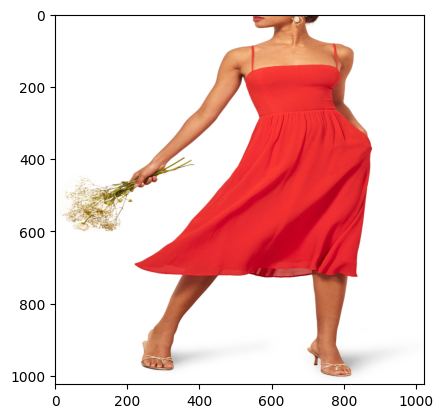

In [18]:
#Verfiy the image_id to index map is correct 
show_image_hdf5(0, 'train_data.h5')

In [11]:

#convert the 2d numpy array of in_seq and out_seq to individual rows of a dataframe, which we can feed in the model 
#refer: https://stackoverflow.com/questions/50217968/pandas-split-list-in-column-into-multiple-rows

train_data =  pd.DataFrame([
                            [image_id, image_id_idx, in_seq, out_seq] for image_id , image_id_idx, in_seqs , out_seqs in db_train[['id', 'image_id_idx', 'in_seq', 'out_seq']].values
                            #for in_seq in in_seqs for out_seq in out_seqs
                            for in_seq, out_seq in zip(in_seqs, out_seqs)
                            ]
                          , columns = ['image_id', 'image_id_idx', 'in_seq', 'out_seq']
                          )

In [24]:
#with pd.option_context("display.max_colwidth", None):
#    print(pd.concat([train_data.head(), train_data.sample(5, random_state=32), train_data.tail()], axis = 0))

with pd.option_context("display.max_colwidth", None):
    print(train_data.head(7))

   image_id  image_id_idx  \
0     30695             0   
1     30695             0   
2     30695             0   
3     30695             0   
4     30695             0   
5     30695             0   
6     81404             1   

                                                 in_seq  \
0         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2305]   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2305, 4517]   
3   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2305, 4517, 8]   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2305, 4517, 8, 97]   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2305, 4517, 8, 97, 5]   
6         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]   

                                                                                                                                                                                                                                                                                                      

In [12]:
train_data.shape

(129214, 4)

In [12]:
del [db_train]
gc.collect()

0

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129214 entries, 0 to 129213
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_id      129214 non-null  int64 
 1   image_id_idx  129214 non-null  int64 
 2   in_seq        129214 non-null  object
 3   out_seq       129214 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.9+ MB


In [ ]:
#Save train data to a file

train_data.to_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'train_in_seq_data.parquet'), 
                     engine = 'pyarrow', 
                     compression = 'gzip'
                     )

del [train_data]
gc.collect()

#### Validation data ####

In [12]:

valid_image_id_idx_map = create_image_id_to_idx_map('validate_data.h5')
db_valid['image_id_idx'] = db_valid['id'].map(valid_image_id_idx_map)

del [valid_image_id_idx_map]


db_valid['in_seq'] = db_valid['preprocess_caption'].apply(create_in_seq)
db_valid['out_seq'] = db_valid['preprocess_caption'].apply(create_out_seq)

db_valid.head()

,id,title,image_name,color,clean_title,clean_color,caption,word_cnt,preprocess_caption,image_id_idx,in_seq,out_seq
14410,89990,rowan high top sneaker,017bdec5-0904-4aad-a064-9015dc61e290.jpeg,Black,rowan high top sneaker,black,black rowan high top sneaker,5,<start> black rowan high top sneaker <end>,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
9458,37053,pointelle wool cotton turtleneck sweater,ba8ed7f8-e65a-4849-bc83-6a4d44e265d9.jpeg,Black,pointelle wool cotton turtleneck sweater,black,black pointelle wool cotton turtleneck sweater,6,<start> black pointelle wool cotton turtleneck...,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
10847,18355,soliman tiered minidress,a23f2176-15a8-46e1-9d75-bd4b5e43c099.jpeg,Black,soliman tiered minidress,black,black soliman tiered minidress,4,<start> black soliman tiered minidress <end>,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
9131,23582,romper,9ee645c7-513f-4867-a1b6-64eaaf61690c.jpeg,Black,romper,black,black romper,2,<start> black romper <end>,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
11487,39540,snowfall low rise thongs,30ff69cc-3684-4e1d-adc4-1b5bb08dde21.jpeg,Black/ Whit,snowfall low rise thongs,black whit,black whit snowfall low rise thongs,6,<start> black whit snowfall low rise thongs <end>,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."


In [13]:
#Let's look at in detail for a row
with pd.option_context("display.max_colwidth", None):
    print(db_valid.iloc[0,:])

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [14]:
valid_data =  pd.DataFrame([
                            [image_id, image_id_idx, in_seq, out_seq] for image_id , image_id_idx, in_seqs , out_seqs in db_valid[['id', 'image_id_idx', 'in_seq', 'out_seq']].values
                            for in_seq, out_seq in zip(in_seqs, out_seqs)
                            ]
                          , columns = ['image_id', 'image_id_idx', 'in_seq', 'out_seq']
                          )


In [15]:
#with pd.option_context("display.max_colwidth", None):
#    pd.concat([valid_data.head(), valid_data.sample(5, random_state = 32), valid_data.tail()], axis = 0)

with pd.option_context("display.max_colwidth", None):
    print(valid_data.head(7))

   image_id  image_id_idx  \
0     89990             0   
1     89990             0   
2     89990             0   
3     89990             0   
4     89990             0   
5     89990             0   
6     37053             1   

                                                in_seq  \
0        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]   
1        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4]   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3315]   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3315, 27]   
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3315, 27, 12]   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3315, 27, 12, 47]   
6        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]   

                                                                                                                                                                                                                                                                                                              

Records in validate_data.h5 dataset: 1902
Image id: 89990


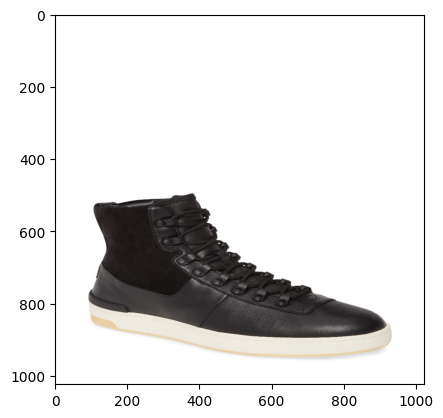

In [16]:
#Verfiy the image_id to index map is correct 
show_image_hdf5(0, 'validate_data.h5')

In [17]:
valid_data.shape

(13747, 4)

In [18]:
del [db_valid]
gc.collect()

2970

In [19]:
#Save valid data to a file

valid_data.to_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'valid_in_seq_data.parquet'), engine = 'pyarrow', compression = 'gzip')

In [ ]:
del [valid_data]
gc.collect()